In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Lambda
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import confusion_matrix
from keras import regularizers
import random
import itertools    
import sys
from matplotlib import pyplot as plt
from matplotlib import patches


Using TensorFlow backend.


In [2]:
file = open(r'C:\Users\valer\Downloads\ships-in-satellite-imagery\shipsnet.json')
dataset = json.load(file)
file.close()

In [ ]:
dataset.keys()

In [3]:
def preprocessing(dataset):
    data = np.array(dataset['data']).astype('uint8')
    labels = np.array(dataset['labels']).astype('uint8')
    x = data.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
    x = x / 255.0
    y = to_categorical(labels, num_classes=2)
    return x,y,labels

In [4]:
data, labels, y = preprocessing(dataset)

In [7]:
print('Total number of images: {}'.format(len(data)))
print('Number of NoShip Images: {}'.format(np.sum(y == 0)))
print('Number of Ship Images: {}'.format(np.sum(y == 1)))

Total number of images: 4000
Number of NoShip Images: 3000
Number of Ship Images: 1000


In [5]:
#This function gives two lists:
#ship contains the positions of the immage with a ship
#no_ship contains the positions of the immage without a ship

def get_ship_noship(y):
    ship = []
    no_ship = []
    for i in range(len(y)):
        if y[i] == 1:
            ship.append(i)
        else:
            no_ship.append(i)
    return ship, no_ship

In [8]:
ship, no_ship = get_ship_noship(y)

In [5]:
#Mapping labels with output classes
dict_classes = {0: 'Not a Ship',
           1: 'Ship'}

In [10]:
def show_immage(position):
    index = random.choice(position)   #Select a random element from the list 
    pixel_vals = data[index]
    im = pixel_vals.reshape((80,80,3))
    plt.imshow(im)
    plt.xlabel(dict_characters[y[index]])

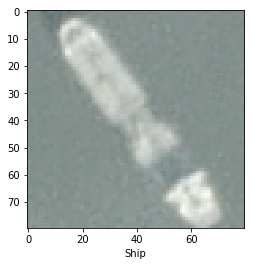

In [11]:
show_immage(ship)

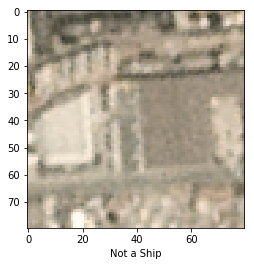

In [12]:
show_immage(no_ship)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(3200, 80, 80, 3)

In [15]:
X_test.shape

(800, 80, 80, 3)

In [7]:
aug = ImageDataGenerator(shear_range=0.1, 
                         width_shift_range=0.15,
                         height_shift_range=0.05, 
                         zoom_range=0.3,
                         horizontal_flip=True,
                         vertical_flip=True, 
                         fill_mode="nearest")

In [8]:
model =  Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(18, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model =  Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(80,80,3), kernel_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(18, kernel_size=3, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 39, 39, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 18)        5

In [8]:
#bs = 32
#epochs = 10
#history = model.fit(X_train, y_train, batch_size=20, epochs=15, validation_split=0.2)


In [10]:
batch__size = 32
epochs_ = 15
history = model.fit_generator(aug.flow(X_train, y_train, batch_size = batch__size),
          validation_data = (X_test, y_test),
          steps_per_epoch = len(X_train) // batch__size,
          epochs = epochs_, verbose=2)

Epoch 1/15
100/100 - 64s - loss: 0.4224 - accuracy: 0.8213 - val_loss: 0.5659 - val_accuracy: 0.7387
Epoch 2/15
100/100 - 61s - loss: 0.2921 - accuracy: 0.8809 - val_loss: 0.3739 - val_accuracy: 0.7962
Epoch 3/15
100/100 - 63s - loss: 0.2732 - accuracy: 0.8869 - val_loss: 0.3662 - val_accuracy: 0.8037
Epoch 4/15
100/100 - 60s - loss: 0.2639 - accuracy: 0.8913 - val_loss: 0.3069 - val_accuracy: 0.8238
Epoch 5/15
100/100 - 60s - loss: 0.2258 - accuracy: 0.9069 - val_loss: 0.1967 - val_accuracy: 0.9150
Epoch 6/15
100/100 - 60s - loss: 0.2189 - accuracy: 0.9081 - val_loss: 0.2429 - val_accuracy: 0.8988
Epoch 7/15
100/100 - 60s - loss: 0.2299 - accuracy: 0.9041 - val_loss: 0.6182 - val_accuracy: 0.8487
Epoch 8/15
100/100 - 61s - loss: 0.2108 - accuracy: 0.9225 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 9/15
100/100 - 60s - loss: 0.1704 - accuracy: 0.9316 - val_loss: 0.1156 - val_accuracy: 0.9613
Epoch 10/15
100/100 - 61s - loss: 0.1682 - accuracy: 0.9353 - val_loss: 0.1967 - val_accura

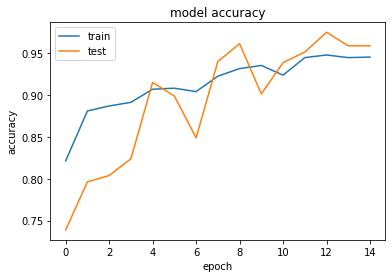

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

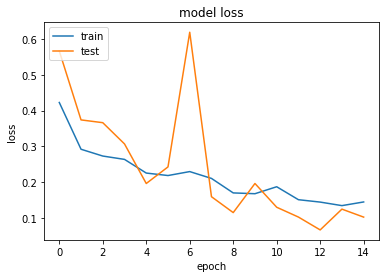

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

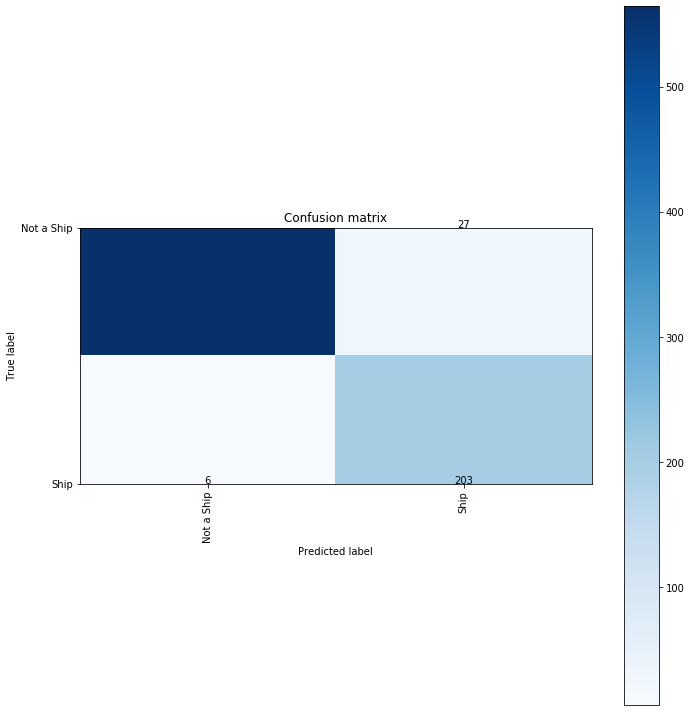

In [15]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(dict_classes.values()))

In [16]:
import PIL
from PIL import Image
scene = PIL.Image.open(r'C:\Users\valer\Downloads\ships-in-satellite-imagery\scenes\scenes\sfbay_1.png')
tensor = np.array(scene).astype('uint8') / 255

In [ ]:
plt.imshow(image)

In [17]:
width, height = scene.size

STEP_SIZE = 10

ships = {}

for row in range(0, height, STEP_SIZE):
    for col in range(0, width, STEP_SIZE):
        area = tensor[row:row+80, col:col+80, 0:3]
        
        if area.shape != (80, 80, 3):
            continue
            
        prediction = model.predict(np.array([area]))
        score = prediction[0][1]
        
        if score > 0.5:
            print(f"found ship at [{row},{col}] with score {score}")
            ships[row, col] = score

found ship at [20,2410] with score 0.5663997530937195
found ship at [30,1150] with score 0.6383013725280762
found ship at [30,1160] with score 0.8621923923492432
found ship at [30,1170] with score 0.6576842665672302
found ship at [30,2410] with score 0.7066384553909302
found ship at [30,2420] with score 0.9770861268043518
found ship at [30,2430] with score 0.8315597176551819
found ship at [40,1150] with score 0.9671111702919006
found ship at [40,1160] with score 0.9899951219558716
found ship at [40,1170] with score 0.7205723524093628
found ship at [40,2440] with score 0.5307522416114807
found ship at [40,2460] with score 0.8751472234725952
found ship at [40,2470] with score 0.8194061517715454
found ship at [40,2500] with score 0.6110015511512756
found ship at [50,1150] with score 0.953093945980072
found ship at [50,1160] with score 0.9681126475334167
found ship at [60,1150] with score 0.8165735602378845
found ship at [60,1160] with score 0.6992306113243103
found ship at [80,2640] with 

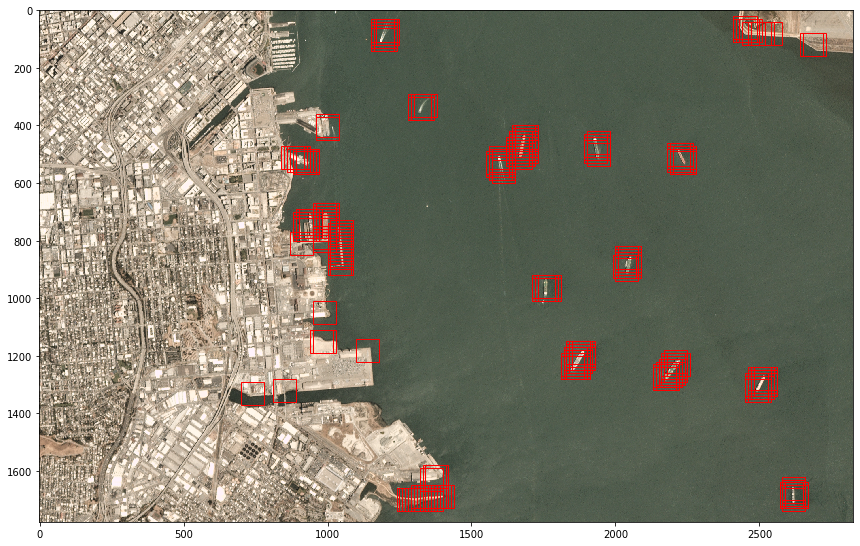

In [18]:
fig = plt.figure(figsize=(16,32))
ax = fig.add_subplot(3, 1, 1)

ax.imshow(tensor)

for ship in ships:
    row, col = ship
    ax.add_patch(patches.Rectangle((col, row), 80, 80, edgecolor='r', facecolor='none'))

plt.show()